# Neural Network example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def forwardprop(X, W, b, V, c):
    Z = 1 / (1 + np.exp(-X.dot(W) - b))
    A = Z.dot(V) + c
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [3]:
def classification_rate(Y, P):
    # targets Y, predictions P
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [52]:
Nclass = 500 # samples per class

In [53]:
# 3 Gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.concatenate([X1, X2, X3])

In [54]:
# Output labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

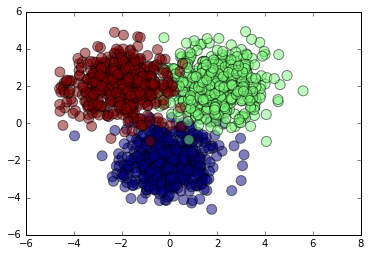

In [55]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)

In [56]:
D = 2 # 2-dimension features
M = 3 # 3 hidden lyaers
K = 3 # 3 classes

In [57]:
def initialize_weights(D, M, K):
    W = np.random.randn(D,M)
    b = np.random.randn(M)
    V = np.random.randn(M, K)
    c = np.random.randn(K)
    return W, b, V, c

In [66]:
W, b, V, c = initialize_weights(D, M, K)
P_Y_given_X, _ = forwardprop(X, W, b, V, c) # P(Y|X)
P = np.argmax(P_Y_given_X, axis=1)

assert(len(P)==len(Y))

In [67]:
print("Classification rate = {:.4f}".format(classification_rate(Y, P)))

Classification rate = 0.3333


## Back propagation

In [80]:
def cost(T, Y):
    tot = T * np.log(Y)
    return -1 * tot.sum()

In [69]:
def derivative_w2(Z, T, Y): # dJ/dw2
    N, K = T.shape
    M = Z.shape[1]
    
    # slow way
#     ret1 = np.zeros((M, K))
#     for n in xrange(N):
#         for m in xrange(M):
#             for k in xrange(K):
#                 ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]
#     return ret1

    # slightly slower way
#     ret2 = np.zeros((M, K))
#     for n in xrange(N):
#         for k in xrange(K):
#             ret2[:,k] += (T[n,k] - Y[n,k])*Z[n,:]
            
    # yet another less slow way
#     ret3 = np.zeros((M,K))
#     for n in xrange(N):
#         ret3 += np.outer(Z[n], T[n] - Y[n])
#     return ret3

    ret4 = (Z.T).dot(T-Y)
    return ret4

def derivative_b2(T, Y):
    return (T-Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
#     N, D = X.shape
#     M, K = W2.shape
    
#     ret1 = np.zeros((D, M))
#     for n in xrange(N):
#         for k in xrange(K):
#             for m in xrange(M):
#                 for d in xrange(D):
#                     ret1[d,m] += ( T[n,k]-Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])*X[n,d]
#     return ret1
    dZ = (T-Y).dot(W2.T) * Z * (1-Z)
    return (X.T).dot(dZ)


def derivative_b1(T, Y, W2, Z):
    return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)

In [70]:
N = len(Y)

In [71]:
T = np.zeros((N, K)) # turn Y vector into OHE target indicator matrix
for i in xrange(N):
    j = int(Y[i])
    T[i,j] = 1

In [72]:
learning_rate = 10e-7

In [84]:
W1, b1, W2, b2 = initialize_weights(D, M, K)
costs = []
rates = []
predictions = []
for epoch in xrange(100000):
    output, hidden = forwardprop(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        #print("cost:", c, "classification_rate:", r)
        costs.append(c)
        rates.append(r)
    
    if epoch in [0, 100, 1000, 10000, 100000]:
        predictions.append(P)
        
    # in back prop we move right to left
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)


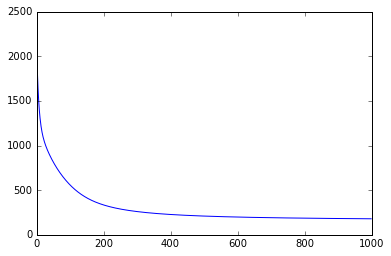

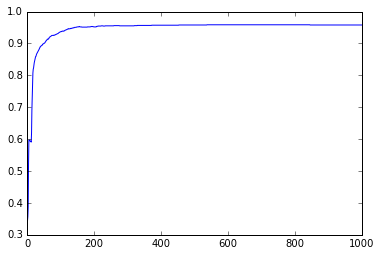

In [85]:
plt.plot(costs)
plt.show()
plt.plot(rates)
plt.show()

Take a look at predictions

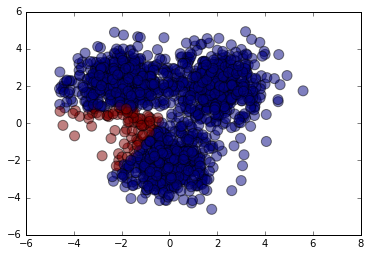

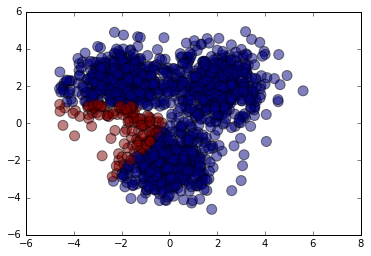

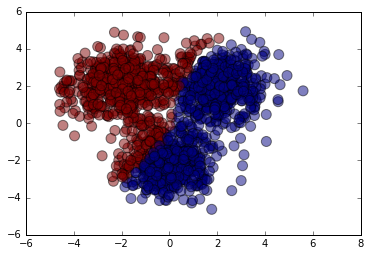

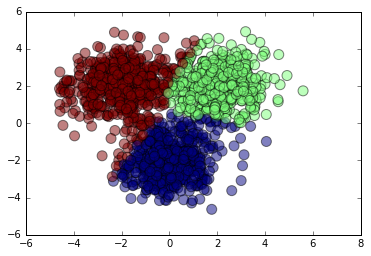

In [86]:
for p in predictions:
    plt.scatter(X[:,0], X[:,1], c=p, s=100, alpha=0.5)
    plt.show()